In [1]:
import cv2

image = cv2.imread(r'C:\Users\90551\maps\cs2_map6.jpg')

def mouse_callback(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:  
        b, g, r = image[y, x]
        print(f"Koordinat: ({x}, {y}), Renk (BGR): {b}, {g}, {r}")

cv2.namedWindow("Mini Harita")
cv2.setMouseCallback("Mini Harita", mouse_callback)

while True:
    cv2.imshow("Mini Harita", image)
    key = cv2.waitKey(1) & 0xFF
    if key == 27:  # ESC ile çık
        break

cv2.destroyAllWindows()



Koordinat: (129, 61), Renk (BGR): 62, 51, 231
Koordinat: (135, 60), Renk (BGR): 69, 51, 218
Koordinat: (131, 60), Renk (BGR): 46, 48, 220
Koordinat: (131, 63), Renk (BGR): 63, 48, 230
Koordinat: (131, 59), Renk (BGR): 51, 51, 227
Koordinat: (132, 64), Renk (BGR): 73, 52, 221
Koordinat: (129, 61), Renk (BGR): 62, 51, 231
Koordinat: (134, 59), Renk (BGR): 59, 47, 219
Koordinat: (222, 45), Renk (BGR): 63, 64, 168
Koordinat: (221, 48), Renk (BGR): 3, 3, 227
Koordinat: (225, 48), Renk (BGR): 0, 0, 193
Koordinat: (227, 48), Renk (BGR): 74, 68, 203
Koordinat: (226, 51), Renk (BGR): 28, 13, 201
Koordinat: (221, 53), Renk (BGR): 59, 59, 165
Koordinat: (219, 49), Renk (BGR): 2, 0, 229
Koordinat: (223, 48), Renk (BGR): 0, 0, 203
Koordinat: (223, 50), Renk (BGR): 8, 2, 239
Koordinat: (225, 50), Renk (BGR): 20, 9, 236
Koordinat: (171, 13), Renk (BGR): 141, 126, 207


Düşman Kuzeybatı yönünde!


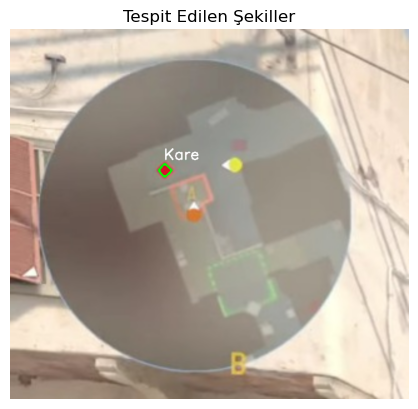

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Görüntüyü yükleyin
image = cv2.imread(r'C:\Users\90551\maps\cs2_map1.jpg')

# Görüntüyü yeniden boyutlandırma
height, width = image.shape[:2]
new_width = 800  # Yeni genişlik
aspect_ratio = float(new_width) / width
new_height = int(height * aspect_ratio)
resized_image = cv2.resize(image, (new_width, new_height))

# Görüntüyü HSV renk alanına dönüştür
hsv_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2HSV)

# Kırmızı nesneler için maske
lower_hsv = (166, 195, 150)
upper_hsv = (186, 255, 255)
red_mask = cv2.inRange(hsv_image, lower_hsv, upper_hsv)

# Gürültüyü azaltmak için bulanıklaştırma
blurred_image = cv2.GaussianBlur(red_mask, (5, 5), 0)

# Eşikleme uygulama
_, thresholded_image = cv2.threshold(blurred_image, 100, 255, cv2.THRESH_BINARY)

# Konturları bul
contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Oyuncu pozisyonunu tanımla (görüntüde merkez)
player_pos = (new_width // 2, new_height // 2)

# Yön hesaplama fonksiyonu (pusula yönleri)
def calculate_direction(dx, dy):
    angle = (math.degrees(math.atan2(dy, dx)) + 360) % 360  # Açıyı 0-360 aralığına getir

    if 337.5 <= angle or angle < 22.5:
        return "Doğu"
    elif 22.5 <= angle < 67.5:
        return "Güneydoğu"
    elif 67.5 <= angle < 112.5:
        return "Güney"
    elif 112.5 <= angle < 157.5:
        return "Güneybatı"
    elif 157.5 <= angle < 202.5:
        return "Batı"
    elif 202.5 <= angle < 247.5:
        return "Kuzeybatı"
    elif 247.5 <= angle < 292.5:
        return "Kuzey"
    elif 292.5 <= angle < 337.5:
        return "Kuzeydoğu"

# Her bir contour için işlem yap
for contour in contours:
    # Konturun çevresini hesapla
    perimeter = cv2.arcLength(contour, True)
    
    # Konturu yaklaşık bir şekle indir (daha az kenar için sadeleştirme)
    approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)

    # Şekli tanımlama
    if len(approx) == 4:  # 4 kenar -> Kare veya Dikdörtgen
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = float(w) / h
        area = cv2.contourArea(contour)
        
        # Kareyi tespit etme (en-boy oranı yaklaşık 1 olmalı)
        if 0.9 <= aspect_ratio <= 1.1:  # Kare
            if area > 100:  # Alanı büyükse kare
                shape = "Kare"
                
                # Düşmanın yönünü hesapla
                enemy_pos = (x + w // 2, y + h // 2)  # Düşman pozisyonu
                dx = enemy_pos[0] - player_pos[0]
                dy = enemy_pos[1] - player_pos[1]
                
                direction = calculate_direction(dx, dy)
                print(f"Düşman {direction} yönünde!")
            else:
                shape = "Diğer"
        else:  # Dikdörtgen (Bombanın bulunduğu yer)
            shape = "Dikdortgen"
            
            # Bombanın yönünü hesapla
            bomb_pos = (x + w // 2, y + h // 2)  # Bomba pozisyonu
            dx = bomb_pos[0] - player_pos[0]
            dy = bomb_pos[1] - player_pos[1]
            
            direction = calculate_direction(dx, dy)
            print(f"Bomba {direction} yönünde!")
    else:
        shape = "Diğer"

    cv2.drawContours(resized_image, [contour], -1, (0, 255, 0), 3)  # Yeşil kontur 
    x, y = approx.ravel()[0], approx.ravel()[1]
    cv2.putText(resized_image, shape, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title("Tespit Edilen Şekiller")
plt.axis("off")
plt.show()


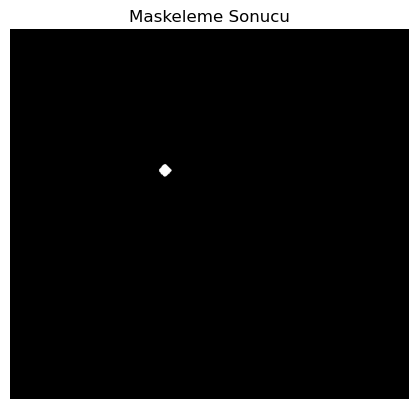

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Görüntüyü yükleyin
image = cv2.imread(r'C:\Users\90551\maps\cs2_minimap.jpg')

# Görüntüyü yeniden boyutlandırma
height, width = image.shape[:2]
new_width = 800  # Yeni genişlik
aspect_ratio = float(new_width) / width
new_height = int(height * aspect_ratio)
resized_image = cv2.resize(image, (new_width, new_height))

# Görüntüyü HSV renk alanına dönüştür
hsv_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2HSV)

# Kırmızı nesneler için maske
lower_hsv = (166, 195, 150)
upper_hsv = (186, 255, 255)
red_mask = cv2.inRange(hsv_image, lower_hsv, upper_hsv)

# Maske üzerine görselleştirme
plt.imshow(red_mask, cmap='gray')
plt.title("Maskeleme Sonucu")
plt.axis("off")
plt.show()


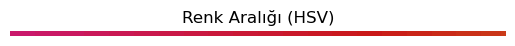

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Renk aralığı tanımları
lower_hsv = (166, 195, 150)
upper_hsv = (186, 255, 255)

# HSV renk aralığını içeren bir boş görüntü oluştur
h_values = np.linspace(lower_hsv[0], upper_hsv[0], 100)  # H tonları
s_value = (lower_hsv[1] + upper_hsv[1]) // 2  # Ortalama S değeri
v_value = (lower_hsv[2] + upper_hsv[2]) // 2  # Ortalama V değeri

color_strip = []
for h in h_values:
    hsv_color = np.uint8([[[h, s_value, v_value]]])  # HSV renk
    bgr_color = cv2.cvtColor(hsv_color, cv2.COLOR_HSV2BGR)  # BGR'ye dönüştür
    color_strip.append(bgr_color[0][0])

# Görselleştir
color_strip = np.array(color_strip, dtype=np.uint8).reshape(1, -1, 3)  # Şerit haline getir
plt.imshow(cv2.cvtColor(color_strip, cv2.COLOR_BGR2RGB))
plt.title("Renk Aralığı (HSV)")
plt.axis("off")
plt.show()
